Implementation of Gradient Descent Algorithm in a Linear Regression Model by _Sudipto Ghosh_ as a part of the course on **Machine Learning** by _Andrew Ng_.

# Gradient Descent Algorithm

**REPEAT UNTIL CONVERGENCE** $\big\{$

$ \qquad \theta_0 := \theta_j - \alpha \frac{\partial}{\partial\,\theta_0} \Big(J(\theta_0, \theta_1)\Big) $

$\qquad \theta_1 := \theta_j - \alpha \frac{\partial}{\partial\,\theta_1} \Big(J(\theta_0, \theta_1)\Big)$

$\big\}$

# Linear Regression Model

## Key functions

### Hypothesis Function

$ h_{\theta}(x) = \theta_{0} + \theta_{1}x $ where,
 - $ x $ is the independent variable in the training example
 - $ \theta_{0}, \theta_{1} $ are the model parameters
 
### Cost Function

$ J(\theta_{0}, \theta_{1}) = \frac{1}{2m} \Big[ \sum_{i=1}^{m} (h_\theta(x_i) - y_i)^2 \Big] $ where,
- $ m $ is the number of examples in the training set
- $ \theta_{0}, \theta_{1} $ are the model parameters
- $ (x_i, y_i) $ is the $ i^{th} $ training example 

## Goal of the Model

**Minimize $J(\theta_0, \theta_1)$ and hence find the optimum $ \theta_0, \theta_1 $ to apply to $h_\theta(x)$**

# Linear Regression with Gradient Descent

**REPEAT UNTIL CONVERGENCE** $\big\{$

$ \qquad \theta_0 := \theta_j - \alpha\,\big(\frac{1}{m}\big) \Big(\sum_{i=1}^m (h_\theta(x_i) - y_i)\Big) $

$\qquad \theta_1 := \theta_j - \alpha\,\big(\frac{1}{m}\big)\Big(\sum_{i=1}^m (h_\theta(x_i) - y_i)\,x_i\Big) $

$\big\}$

# Download Data

Data is available on a GitHub repository and can be fetched using `curl` and stored as `ex1data1.txt` in the root folder of this script.

In [0]:
%%capture
!curl "https://raw.githubusercontent.com/rieder91/MachineLearning/master/Exercise%201/ex1/ex1data1.txt" > ex1data1.txt

# Import Dependencies

NumPy, Pandas and Matplotlib will be required in this implementation.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the Cost Function

In [0]:
def costFunction(x, y, theta):
  """
  Cost Function: J(θ)
  @returns (
  sum of (squares of all elements of (x.θ - y))
  _____________________________________________
                    2 * m
  )
  """
  m = len(y)
  t = np.dot(x, theta) - y
  return np.sum(np.power(t, 2)) / (2 * m)

# Define the Gradient Descent Function

In [0]:
def gradientDescent(x, y, theta, alpha, iterations = 100):
  """
  Gradient Descent Algorithm
  repeat until convergence {
    θ_j = θ_j - (
        (alpha / m)
      * partial derivative of
        cost function wrt θ_j
    ) (for j = 0 and j = 1)
  }
  @returns theta matrix with optimum
  values of θ_0, θ_1
  """
  m = float(len(x))
  for i in range(iterations):
    t = np.dot(x.T, (np.dot(x, theta) - y)) # x' . (x.θ - y)
    theta = theta - ((alpha / m) * t)
  return theta

# Define Helper Functions

In [0]:
def predict(x, theta):
  """
  Predict y-coordinates of hypothesis function
  """
  return np.dot(x, theta)

def plot(x, y, theta):
  plt.scatter(x[:,1], y)
  plt.plot(x[:,1], predict(x, theta), color = "red")
  plt.xlabel("Population in 10,000's")
  plt.ylabel("Price in $10,000's")
  plt.show()

# Load and Clean Data

In [6]:
# Loading and Examining Data
data = pd.read_csv("ex1data1.txt", header = None)
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [0]:
# Seperating Columns into X and Y matrices
X = data.iloc[:,0]
Y = data.iloc[:,1]

# Change shape of X, Y from (m,) to (m,1)
X = X[:,np.newaxis]
Y = Y[:,np.newaxis]

# Add a 'ones' column to the left of X
# to take into account the intercept θ_0
X = np.hstack((np.ones((len(X), 1)), X))

# Find Optimum Parameters

In [8]:
# Optimum theta matrix from GD algorithm
optimum_theta = gradientDescent(
    X, Y, np.zeros([2, 1]), 0.01, 2000
)
print(f"Optimum theta matrix:\n{optimum_theta}")

Optimum theta matrix:
[[-3.78806857]
 [ 1.18221277]]


# Inspect Value of the Cost Function

In [9]:
print(f"Value of J(θ) with θ_0=0, θ_1=0: \
  {costFunction(X, Y, np.zeros([2, 1]))}"
)
print(f"Value of J(θ) with optimized θ: \
  {costFunction(X, Y, optimum_theta)}"
)

Value of J(θ) with θ_0=0, θ_1=0:   32.072733877455676
Value of J(θ) with optimized θ:   4.4780276098799705


# Plot Data and Regression Line

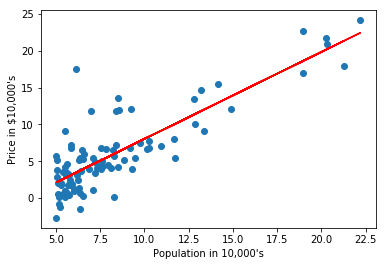

In [10]:
plot(X, Y, optimum_theta)